In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Database for programmers
* import two database about 2018 and 2019 stack overflow

In [22]:
df2019 = pd.read_csv('developer_survey_2019/survey_results_public.csv', low_memory = False) # 88883 rows * 85
df2019_schema = pd.read_csv('developer_survey_2019/survey_results_schema.csv') #85 rows * 2
df2018 = pd.read_csv('developer_survey_2018/survey_results_public.csv', low_memory = False)
df2018_schema = pd.read_csv('developer_survey_2018/survey_results_schema.csv') 

* merge two database to see what common columns do they share? 
* Then decide which features to study and compare.

In [23]:
mergedStuff = pd.merge(df2019_schema, df2018_schema, on=['Column'], how='inner')
mergedStuff

,Column,QuestionText_x,QuestionText_y
0,Respondent,Randomized respondent ID number (not in order ...,Randomized respondent ID number (not in order ...
1,OpenSource,How do you feel about the quality of open sour...,Do you contribute to open source projects?
2,Employment,Which of the following best describes your cur...,Which of the following best describes your cur...
3,Country,In which country do you currently reside?,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree...","Are you currently enrolled in a formal, degree..."
5,UndergradMajor,What was your main or most important field of ...,You previously indicated that you went to a co...
6,DevType,Which of the following describe you? Please se...,Which of the following describe you? Please se...
7,CurrencySymbol,Which currency do you use day-to-day? If your ...,Three digit currency abbreviation.
8,LanguageWorkedWith,"Which of the following programming, scripting,...","Which of the following programming, scripting,..."
9,LanguageDesireNextYear,"Which of the following programming, scripting,...","Which of the following programming, scripting,..."


* Employment Status was selected and used to compare 2018 and 2019 data.

## Q1: 2019 VS 2018: Employment Status change over time

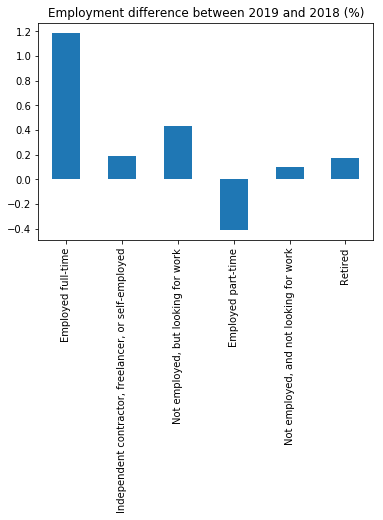

In [24]:
# employment status for all the respondents across the world
emp_vals2019 = df2019['Employment'].value_counts()
emp_vals2018 = df2018['Employment'].value_counts()
diff_emp = (emp_vals2019/df2019.shape[0] - emp_vals2018/df2018.shape[0]) * 100
diff_emp.plot(kind = 'bar', title = 'Employment difference between 2019 and 2018 (%)')


#### Overall, 2019 and 2018 had similar employment status, while full-time employment in 2019 is a little higher than 2018

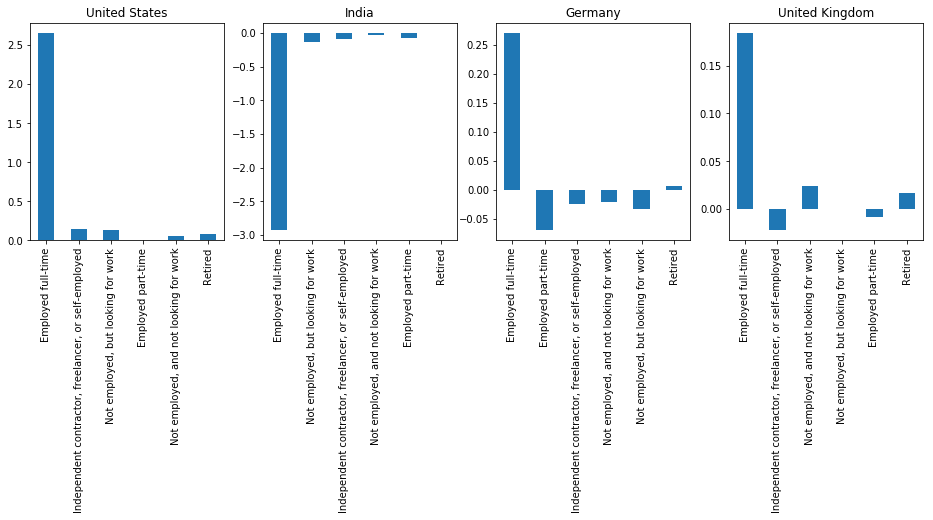

In [25]:
# pick four countries with the most respondents, to explore their employment status change from 2018 to 2019
fix, axes = plt.subplots(1,4, figsize = (16, 4))

for i, col in enumerate(df2019['Country'].value_counts().index.tolist()[:4]):
    emp_vals2019 = df2019[df2019['Country'] == col]['Employment'].value_counts()
    emp_vals2018 = df2018[df2018['Country'] == col]['Employment'].value_counts()    
    diff_emp = (emp_vals2019/df2019.shape[0] - emp_vals2018/df2018.shape[0])*100
    diff_emp.plot(kind = 'bar', ax = axes[i])
    axes[i].set_title(col)


#### United States, Germany, and UK increased full-time employment in 2019 compared with that in 2018, except India. 

## Q2: How to earn more in USA as a developer?
* Pick four factors to study how they affect 'ConvertedComp'
* 'ConvertedComp' is equal to salary

In [26]:
# only study the USA data
df2019USA = df2019[df2019['Country'] == 'United States']

In [27]:
# Define a function to study how factors affect their annual salary

def Affect_Salary(factor):
    # group 2019 USA dataset by the factor, then sort values in the descending order, set it to framework
    dfnew = df2019USA.groupby([factor]).mean()['ConvertedComp'].sort_values(ascending = False).to_frame().reset_index()
    return dfnew

### Q2.1 Investigate first factor: Education level

In [41]:
Affect_Salary('EdLevel')

,EdLevel,ConvertedComp
0,I never completed any formal education,320903.666667
1,"Professional degree (JD, MD, etc.)",312113.380282
2,"Other doctoral degree (Ph.D, Ed.D., etc.)",284672.331197
3,Associate degree,263449.396369
4,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",254920.980473
5,Primary/elementary school,253074.021277
6,"Bachelor’s degree (BA, BS, B.Eng., etc.)",250414.638052
7,Some college/university study without earning ...,224070.010597
8,"Secondary school (e.g. American high school, G...",211145.783699


* Generally speaking, the higher education you obtained, the more you earned. But, it's not always true for all cases.

### Q2.2 Investigate the second factor: Organization size

In [16]:
Affect_Salary('OrgSize')

,OrgSize,ConvertedComp
0,"5,000 to 9,999 employees",283195.730722
1,"10,000 or more employees",271148.869265
2,20 to 99 employees,250708.273441
3,"1,000 to 4,999 employees",245431.307733
4,2-9 employees,243292.900109
5,100 to 499 employees,239491.594831
6,500 to 999 employees,233419.489464
7,"Just me - I am a freelancer, sole proprietor, ...",223221.114607
8,10 to 19 employees,222568.932597


* Generally speaking, the larger the company size, the more you can earn

### Q2.3 Investigate the third factor: undergraduate major

In [18]:
Affect_Salary('UndergradMajor')

,UndergradMajor,ConvertedComp
0,"A health science (ex. nursing, pharmacy, radio...",376880.977778
1,"A natural science (ex. biology, chemistry, phy...",258395.435021
2,"Computer science, computer engineering, or sof...",256369.854041
3,"Another engineering discipline (ex. civil, ele...",255337.343750
4,"A humanities discipline (ex. literature, histo...",254847.905694
5,"A social science (ex. anthropology, psychology...",243920.077199
6,Mathematics or statistics,241825.474576
7,Fine arts or performing arts (ex. graphic desi...,240795.359699
8,"Information systems, information technology, o...",227547.689655
9,Web development or web design,223386.672269


* The persion with a health science undergraduate major earned the most. The natural science, computer science,
 and engineering majors are top areas with higher salary than others. 

### Q2.4 Investigate the fourth factor: year of coding experience
* We're also curious about the relationship between the years of coding and the income. 


#### Data cleaning
* Remove categorical variable: less than 1 year and more than 50 years
* drop rows with any nan

In [32]:
dftest = df2019USA[ (df2019USA['YearsCode'] != 'Less than 1 year') & (df2019USA['YearsCode'] != 'More than 50 years')].dropna()

#### Salary VS Years of coding 

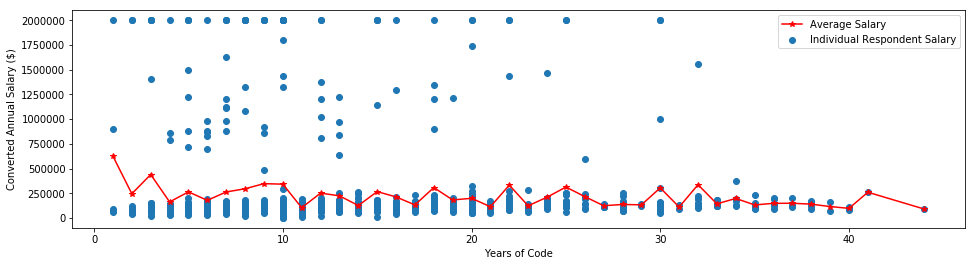

In [34]:
# Export the years of code as the x value

x = dftest['YearsCode'].tolist()
x = [int(i) for i in x]
dftest.loc[:,'YearsCode'] = x
dftest = dftest.sort_values('YearsCode', ascending = False)

# to see the distribution of the 'yearscode' with 'convertedcomp'
x = dftest['YearsCode'].tolist()
y = dftest['ConvertedComp'].tolist()

# calculate the mean value of 'convertedcomp' for each level of 'yearscode'
x1 = [i for i in set(x)]
y1 = dftest.groupby(['YearsCode']).mean()['ConvertedComp'].tolist()

plt.figure(figsize = (16, 4))
plt.scatter(x, y)
plt.plot(x1, y1, marker = '*', c = 'r')
plt.legend(['Average Salary','Individual Respondent Salary'])
plt.xlabel('Years of Code')
plt.ylabel('Converted Annual Salary ($)')
plt.show()

* We expect the longer you know coding, the more you can earn 
* Surprising, people within ten years of code can earn more than the people with longer coding time.


## Q3: Most popular Languages, Database, Platform

### Define a function to count the numbers for the column we are interested

In [38]:
def Count_numbers(df, col):
    '''
    input: df[col] is the targeted database and column to count their numbers
    output: plot the column and their counts; also its dataframework
    '''
    count_num_dict = {}
    for string in df[col].dropna():
        astring = string.split(';')
        for eachstring in astring:
            if eachstring not in count_num_dict:
                count_num_dict.update({eachstring: 1})
            else:
                value = count_num_dict[eachstring]
                count_num_dict.update({eachstring: value + 1})
    df_nums = pd.DataFrame(list(count_num_dict.items()), columns = [col,'Counts']).sort_values('Counts', ascending = False)
    df_nums['Counts'] = df_nums['Counts']/df_nums['Counts'].sum(axis = 0)
    
    return df_nums

### Count the number for each developer role

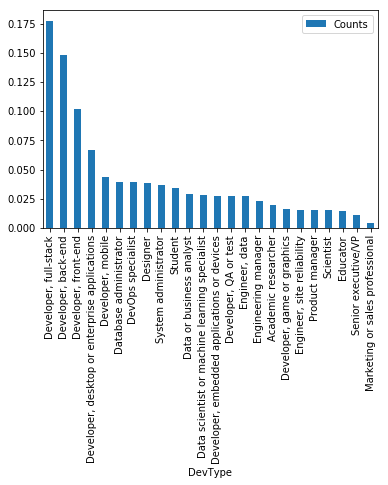

In [39]:
df_dev = Count_numbers(df2019USA, 'DevType')   # DevType # SocialMedia
df_dev.plot(x = 'DevType',y = 'Counts', kind = 'bar')

* Full-stack developer is the most recognised role for the respondents themselves. 

#### Pick a series of descriptors about Language, Database, Platform worked with and desire next year to observe the trends

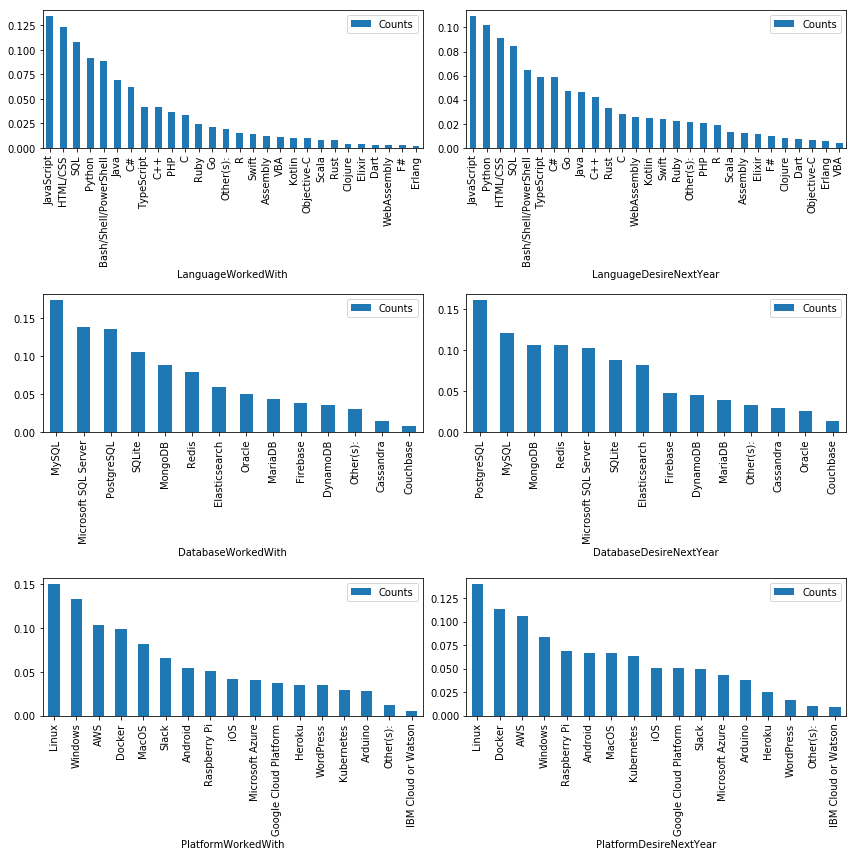

In [22]:

fig, axes = plt.subplots(3, 2, figsize = (12, 12))
descriptors = ['LanguageWorkedWith','LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear']
for i, col in enumerate(descriptors):
    dfnew = Count_numbers(df2019USA, col)
    if i in [0, 1]: # plot for 'LanguageWorkedWith','LanguageDesireNextYear'
        dfnew.plot(x = col,y = 'Counts', kind = 'bar', ax = axes[0, i])
    if i in [2, 3]: # plot for 'DatabaseWorkedWith', 'DatabaseDesireNextYear'
        dfnew.plot(x = col,y = 'Counts', kind = 'bar', ax = axes[1, i - 2])
    if i in [4, 5]: # plot for 'PlatformWorkedWith', 'PlatformDesireNextYear'
        dfnew.plot(x = col,y = 'Counts', kind = 'bar', ax = axes[2, i - 4])        
plt.tight_layout()        

* JavaScript, MySQL, and Linux are the most popular language, database, and platform, respectively. For the language desire next year, Python jumps from fourth to second, which indicates its popularity in the future. Similar observation is also true for the PostgreSQL database and Docker platform.